In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = np.argmax(mnist.test.labels,1)
    
    # Get the predicted classifications for the test-set.
    batch_xs,batch_ys = mnist.test.next_batch(batch_size)
    cls_pred = sess.run(correct_prediction, feed_dict={x:batch_xs,y:batch_ys})

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [2]:
# coding: utf-8

# In[1]:


import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


# In[2]:


#载入数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)#当前路径，‘’可以选择存放路径


# In[12]:


#每个批次大小
batch_size = 100
#计算一共有多少个批次
#数据集的数量整除批次大小=多少个批次
n_batch = mnist.train.num_examples // batch_size

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])#把批次传进去，开始是100，最后一批不一定是多少，我们把平面28*28做成向量传入
y = tf.placeholder(tf.float32,[None,10])#十个标签

#创建一个简单的神经网络
#只用到两个层，784个神经元，输出层为10个神经元
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W)+b)

#定义代价函数
#loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
#使用梯度下降法
# train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

#初始化变量
init = tf.global_variables_initializer()

#定义一个求准确率的方法
#如果两个相同就会返回True,不相同就返回False，然后存入correct_prediction
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))#argmax返回一维张量中最大值所在的位置

#求准确率
#首先把bool值转化为32为浮点值，然后求平均值
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))


# In[14]:




Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [3]:
M = input_data.read_data_sets('MNIST_data',one_hot = False)#当前路径，‘’可以选择存放路径

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(2):#把所有的图片训练21次
        for batch in range (n_batch):#一批一批的迭代，一共运行n_batch次
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)#每次获得100张图片
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print('Iter'+str(epoch) + ',Testing accuracy'+ str(acc))
    prediction  = sess.run(prediction,feed_dict={x:mnist.test.images,y:mnist.test.labels})
    pred = sess.run(tf.argmax(prediction,1),feed_dict={x:mnist.test.images,y:mnist.test.labels})
    confusion = tf.confusion_matrix(labels=M.test.labels,predictions=pred,num_classes=10)
    print(confusion)
    
    #print_confusion_matrix()
#     cls_true = np.argmax(mnist.test.labels,1)
#     y_pred = tf.argmax(tf.nn.softmax(1),dimension=1)
#     y_true = tf.argmax(y,dimension=1)

#     # Get the predicted classifications for the test-set.
#     batch_xs,batch_ys = mnist.test.next_batch(batch_size)
#     cls_pred = sess.run(y_pred, feed_dict={x:batch_xs,y:batch_ys})

#     # Get the confusion matrix using sklearn.
#     cm = confusion_matrix(y_true=cls_true,y_pred=cls_pred)


Iter0,Testing accuracy0.7575
Iter1,Testing accuracy0.8032
Tensor("confusion_matrix/SparseTensorDenseAdd:0", shape=(10, 10), dtype=int32)


In [5]:
confusion

<tf.Tensor 'confusion_matrix/SparseTensorDenseAdd:0' shape=(10, 10) dtype=int32>

In [46]:
for i in range(1,100):
    print(pred[i])
    print('\n')
    print(M.test.labels[i])
    print('**********************')
    

0


2
**********************
0


1
**********************
0


0
**********************
0


4
**********************
0


1
**********************
0


4
**********************
0


9
**********************
0


5
**********************
0


9
**********************
0


0
**********************
0


6
**********************
0


9
**********************
0


0
**********************
0


1
**********************
0


5
**********************
0


9
**********************
0


7
**********************
0


3
**********************
0


4
**********************
0


9
**********************
0


6
**********************
0


6
**********************
0


5
**********************
0


4
**********************
0


0
**********************
0


7
**********************
0


4
**********************
0


0
**********************
0


1
**********************
0


3
**********************
0


1
**********************
0


3
**********************
0


4
**********************
0


7
**********************
0


2
********

In [6]:
prediction[0]

array([3.1668246e-03, 7.9020095e-04, 3.3208127e-03, 5.0684758e-03,
       4.6601859e-03, 2.6408180e-03, 1.0072555e-03, 9.5072955e-01,
       3.7518831e-03, 2.4864065e-02], dtype=float32)

In [7]:
pred[1]

2

In [8]:
pred[100]

6

4

In [9]:
len(pred)

10000

In [10]:
len(M.test.labels)

10000

In [11]:
session = tf.Session()
session.run(tf.initialize_all_variables())


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [12]:
pred = session.run(tf.argmax(prediction,1),feed_dict={x:mnist.test.images,y:mnist.test.labels})
confusion = tf.confusion_matrix(labels=M.test.labels,predictions=pred,num_classes=10)


In [13]:
ff=session.run(confusion)


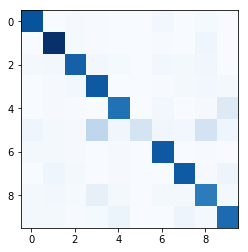

In [14]:
plt.imshow(ff, interpolation='nearest', cmap=plt.cm.Blues)


Text(95.305, 0.5, 'True')

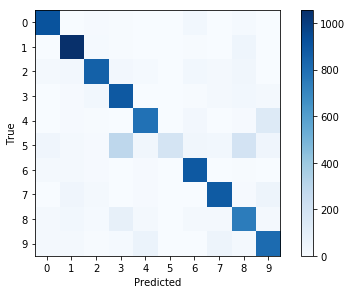

In [19]:
plt.imshow(ff, interpolation='nearest', cmap=plt.cm.Blues)

plt.tight_layout()
plt.colorbar()
C = 10
tick_marks = np.arange(C)
plt.xticks(tick_marks,range(C))
plt.yticks(tick_marks,range(C))
plt.xlabel('Predicted')
plt.ylabel('True')

In [15]:
print(ff)

[[ 916    0    9    7    0    1   31    1   15    0]
 [   0 1057   15    6    1    0    7    1   47    1]
 [  17   27  858   26   15    0   30   21   36    2]
 [   4   11   32  888    1    0    8   19   30   17]
 [   2    9    5    0  791    0   28    2   11  134]
 [  45   22   12  291   34  189   35   29  192   43]
 [  21   19    9    0    9    4  890    0    6    0]
 [   1   45   22    2   10    0    4  881   12   51]
 [  17   33   15   84   19    0   17   20  746   23]
 [  18   19    7   14   64    0    2   52   17  816]]
